In [68]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns

In [2]:
from urllib.request import urlretrieve

In [ ]:
os.makedirs('./data')

In [10]:
url = 'https://covid-19.nyc3.digitaloceanspaces.com/public/owid-covid-data.csv'
urlretrieve(url,'./data/covid_data.csv')

('./data/covid_data.csv', <http.client.HTTPMessage at 0x26a6243b320>)

In [4]:
data = pd.read_csv('./data/covid_data.csv')

In [5]:
data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429430,ZWE,Africa,Zimbabwe,2024-07-31,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429431,ZWE,Africa,Zimbabwe,2024-08-01,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429432,ZWE,Africa,Zimbabwe,2024-08-02,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429433,ZWE,Africa,Zimbabwe,2024-08-03,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN


In [6]:
(data.location == 'India').sum()

np.int64(1682)

In [7]:
data.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [8]:
# data_df2 = ['total_cases','total_deaths','total_tests','total_cases_per_million','new_cases_per_million','total_deaths_per_million','new_deaths_per_million','total_tests_per_thousand','new_tests_per_thousand','positive_rate']

In [9]:
data_df = data[data.location == 'India'][['date','new_cases','new_deaths','new_tests']]

In [10]:
data_df

,date,new_cases,new_deaths,new_tests
173549,2020-01-05,0.0,0.0,NaN
173550,2020-01-06,0.0,0.0,NaN
173551,2020-01-07,0.0,0.0,NaN
173552,2020-01-08,0.0,0.0,NaN
173553,2020-01-09,0.0,0.0,NaN
...,...,...,...,...
175226,2024-08-08,NaN,NaN,NaN
175227,2024-08-09,NaN,NaN,NaN
175228,2024-08-10,NaN,NaN,NaN
175229,2024-08-11,NaN,NaN,NaN


In [11]:
pos_rate = data_df.new_cases.sum()/data_df.new_tests.sum()
print(f'Average positive_rate: {pos_rate}')

Average positive_rate: 0.05369792696301445


In [12]:
death_rate = data_df.new_deaths.sum()/data_df.new_cases.sum()
print(f'Average death_rate: {death_rate}')

Average death_rate: 0.01184729775585086


In [13]:
data_df.describe()

,new_cases,new_deaths,new_tests
count,1.674000e+03,1674.000000,7.950000e+02
mean,2.690666e+04,318.771207,1.055093e+06
std,1.752650e+05,1958.433819,1.379855e+06
min,0.000000e+00,0.000000,1.570000e+02
25%,0.000000e+00,0.000000,4.985255e+05
50%,0.000000e+00,0.000000,1.014079e+06
75%,0.000000e+00,0.000000,1.411204e+06
max,2.738957e+06,28982.000000,3.585563e+07


### On how many days rate of infection > average positive_rate

Try calculating avg_new_cases / month   on monthly basis

In [14]:
No_of_days = (data_df.new_cases>pos_rate).sum()
print(No_of_days)
data_df[data_df.new_cases>pos_rate]

232


,date,new_cases,new_deaths,new_tests
173577,2020-02-02,2.0,0.0,NaN
173584,2020-02-09,5.0,0.0,NaN
173612,2020-03-08,32.0,0.0,NaN
173619,2020-03-15,68.0,2.0,NaN
173626,2020-03-22,253.0,5.0,1298.0
...,...,...,...,...
175187,2024-06-30,334.0,1.0,NaN
175194,2024-07-07,134.0,0.0,NaN
175208,2024-07-21,440.0,1.0,NaN
175215,2024-07-28,243.0,0.0,NaN


### On how many days new_deaths > average death rate

Try calculating avg_new_deaths / month   on monthly basis

In [28]:
Total_days = (data_df.new_deaths>death_rate).sum()
print(Total_days)
data_df[data_df.new_deaths>death_rate]

223


,date,new_cases,new_deaths,new_tests,month,weekday,year
173619,2020-03-15,68.0,2.0,NaN,3,6,2020
173626,2020-03-22,253.0,5.0,1298.0,3,6,2020
173633,2020-03-29,619.0,18.0,NaN,3,6,2020
173640,2020-04-05,2395.0,52.0,9584.0,4,6,2020
173647,2020-04-12,4982.0,196.0,16374.0,4,6,2020
...,...,...,...,...,...,...,...
175159,2024-06-02,362.0,5.0,NaN,6,6,2024
175166,2024-06-09,164.0,2.0,NaN,6,6,2024
175180,2024-06-23,210.0,2.0,NaN,6,6,2024
175187,2024-06-30,334.0,1.0,NaN,6,6,2024


### high_new_cases


Create a frequency distribution (histogram) new_cases (multiple of 1000) v/s No.of dates

In [29]:
high_new_cases = (data_df.new_cases>1000).sum()
print(f'No. of days where new_cases has passed 1000 cases a day: {high_new_cases}')
data_df[data_df.new_cases>1000]

No. of days where new_cases has passed 1000 cases a day: 175


,date,new_cases,new_deaths,new_tests,month,weekday,year
173640,2020-04-05,2395.0,52.0,9584.0,4,6,2020
173647,2020-04-12,4982.0,196.0,16374.0,4,6,2020
173654,2020-04-19,7356.0,234.0,29463.0,4,6,2020
173661,2020-04-26,10784.0,317.0,45352.0,4,6,2020
173668,2020-05-03,13484.0,477.0,70087.0,5,6,2020
...,...,...,...,...,...,...,...
175040,2024-02-04,1063.0,9.0,NaN,2,6,2024
175047,2024-02-11,1012.0,8.0,NaN,2,6,2024
175068,2024-03-03,1177.0,17.0,NaN,3,6,2024
175075,2024-03-10,1202.0,15.0,NaN,3,6,2024


### Data preprocessing

In [30]:
data_df.sort_values('new_cases',ascending=False)

,date,new_cases,new_deaths,new_tests,month,weekday,year
174039,2021-05-09,2738957.0,26820.0,1865428.0,5,6,2021
174032,2021-05-02,2597285.0,23231.0,1804954.0,5,6,2021
174046,2021-05-16,2387663.0,27922.0,NaN,5,6,2021
174025,2021-04-25,2172063.0,15161.0,1719588.0,4,6,2021
174298,2022-01-23,2115100.0,3343.0,2020688.0,1,6,2022
...,...,...,...,...,...,...,...
175226,2024-08-08,NaN,NaN,NaN,8,3,2024
175227,2024-08-09,NaN,NaN,NaN,8,4,2024
175228,2024-08-10,NaN,NaN,NaN,8,5,2024
175229,2024-08-11,NaN,NaN,NaN,8,6,2024


In [31]:
data_df.sort_values('new_cases',ascending=True)

,date,new_cases,new_deaths,new_tests,month,weekday,year
175197,2024-07-10,0.0,0.0,NaN,7,2,2024
173566,2020-01-22,0.0,0.0,NaN,1,2,2020
173567,2020-01-23,0.0,0.0,NaN,1,3,2020
173568,2020-01-24,0.0,0.0,NaN,1,4,2020
173569,2020-01-25,0.0,0.0,NaN,1,5,2020
...,...,...,...,...,...,...,...
175226,2024-08-08,NaN,NaN,NaN,8,3,2024
175227,2024-08-09,NaN,NaN,NaN,8,4,2024
175228,2024-08-10,NaN,NaN,NaN,8,5,2024
175229,2024-08-11,NaN,NaN,NaN,8,6,2024


In [32]:
data_df.sort_values('new_tests',ascending=True)

,date,new_cases,new_deaths,new_tests,month,weekday,year
173628,2020-03-24,0.0,0.0,157.0,3,1,2020
173623,2020-03-19,0.0,0.0,191.0,3,3,2020
173624,2020-03-20,0.0,0.0,1060.0,3,4,2020
173626,2020-03-22,253.0,5.0,1298.0,3,6,2020
173625,2020-03-21,0.0,0.0,1325.0,3,5,2020
...,...,...,...,...,...,...,...
175226,2024-08-08,NaN,NaN,NaN,8,3,2024
175227,2024-08-09,NaN,NaN,NaN,8,4,2024
175228,2024-08-10,NaN,NaN,NaN,8,5,2024
175229,2024-08-11,NaN,NaN,NaN,8,6,2024


In [33]:
data_df.sort_values('new_deaths',ascending=True)

,date,new_cases,new_deaths,new_tests,month,weekday,year
175197,2024-07-10,0.0,0.0,NaN,7,2,2024
173566,2020-01-22,0.0,0.0,NaN,1,2,2020
173567,2020-01-23,0.0,0.0,NaN,1,3,2020
173568,2020-01-24,0.0,0.0,NaN,1,4,2020
173569,2020-01-25,0.0,0.0,NaN,1,5,2020
...,...,...,...,...,...,...,...
175226,2024-08-08,NaN,NaN,NaN,8,3,2024
175227,2024-08-09,NaN,NaN,NaN,8,4,2024
175228,2024-08-10,NaN,NaN,NaN,8,5,2024
175229,2024-08-11,NaN,NaN,NaN,8,6,2024


### Time series data analysis

In [34]:
data_df['date'] = pd.to_datetime(data_df.date)

In [35]:
data_df['month'] = pd.DatetimeIndex(data_df.date).month

In [36]:
data_df['weekday'] = pd.DatetimeIndex(data_df.date).weekday

In [37]:
data_df['year'] = pd.DatetimeIndex(data_df.date).year

In [38]:
data_df

,date,new_cases,new_deaths,new_tests,month,weekday,year
173549,2020-01-05,0.0,0.0,NaN,1,6,2020
173550,2020-01-06,0.0,0.0,NaN,1,0,2020
173551,2020-01-07,0.0,0.0,NaN,1,1,2020
173552,2020-01-08,0.0,0.0,NaN,1,2,2020
173553,2020-01-09,0.0,0.0,NaN,1,3,2020
...,...,...,...,...,...,...,...
175226,2024-08-08,NaN,NaN,NaN,8,3,2024
175227,2024-08-09,NaN,NaN,NaN,8,4,2024
175228,2024-08-10,NaN,NaN,NaN,8,5,2024
175229,2024-08-11,NaN,NaN,NaN,8,6,2024


## For year 2020

In [52]:
data_2020 = data_df[data_df.year == 2020]
data_2020.drop(columns=['date'],inplace=True)
# data_2020 = data_2020.set_index('month')
# print(data_2020)

C:\Users\sahas\AppData\Local\Temp\ipykernel_2732\2437328712.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2020.drop(columns=['date'],inplace=True)


In [97]:
arr = np.arange(1,13,1)
dict = {
    1: 'Jan',
    2: 'Feb',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'Aug',
    9: 'Sept',
    10: 'October',
    11: 'Nov',
    12: 'Dec'
}
month_list = []
for i in arr:
    month_list.append(dict[i])
print(month_list)

['Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'Aug', 'Sept', 'October', 'Nov', 'Dec']


In [98]:
data_df_monthly_2020_sum = data_2020.groupby('month')[['new_cases','new_deaths','new_tests']].sum()
print(data_df_monthly_2020_sum)

       new_cases  new_deaths   new_tests
month                                   
1            0.0         0.0         0.0
2            7.0         0.0         0.0
3          972.0        25.0     12019.0
4        25517.0       799.0    683294.0
5       155647.0      4340.0   2906826.0
6       346716.0     10931.0   4871627.0
7       856663.0     15968.0  10224316.0
8      2157211.0     31435.0  23474944.0
9      2449799.0     31005.0  31888815.0
10     1872279.0     24031.0  34599335.0
11     1528108.0     18162.0  31583912.0
12      794931.0     10926.0  29731625.0


In [99]:
monthly_total_new_cases_2020 = []
monthly_total_new_deaths_2020 = []
for i in range(1,13,1):
    monthly_total_new_cases_2020.append(data_df_monthly_2020_sum.at[i,'new_cases'])
    monthly_total_new_deaths_2020.append(data_df_monthly_2020_sum.at[i,'new_deaths'])
print(monthly_total_new_cases_2020)
print(monthly_total_new_deaths_2020)

[np.float64(0.0), np.float64(7.0), np.float64(972.0), np.float64(25517.0), np.float64(155647.0), np.float64(346716.0), np.float64(856663.0), np.float64(2157211.0), np.float64(2449799.0), np.float64(1872279.0), np.float64(1528108.0), np.float64(794931.0)]
[np.float64(0.0), np.float64(0.0), np.float64(25.0), np.float64(799.0), np.float64(4340.0), np.float64(10931.0), np.float64(15968.0), np.float64(31435.0), np.float64(31005.0), np.float64(24031.0), np.float64(18162.0), np.float64(10926.0)]


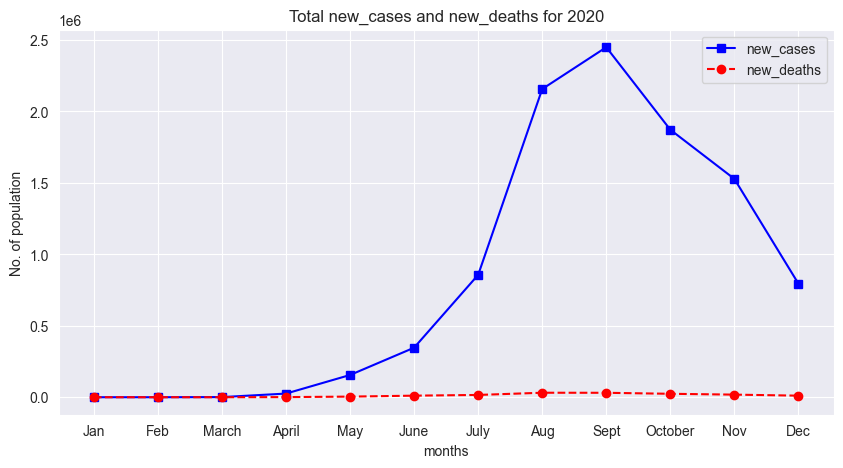

In [100]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,5))
plt.plot(month_list,monthly_total_new_cases_2020,'s-b')
plt.plot(month_list,monthly_total_new_deaths_2020,'o--r')
plt.xlabel('months')
plt.ylabel('No. of population')

plt.title("Total new_cases and new_deaths for 2020")
plt.legend(['new_cases', 'new_deaths']);

In [58]:
data_df_monthly_2020_mean = data_2020.groupby('month')[['new_cases','new_deaths','new_tests']].mean()
print(data_df_monthly_2020_mean)
type(data_df_monthly_2020_mean)

          new_cases   new_deaths     new_tests
month                                         
1          0.000000     0.000000           NaN
2          0.241379     0.000000           NaN
3         31.354839     0.806452  1.717000e+03
4        850.566667    26.633333  2.847058e+04
5       5020.870968   140.000000  9.376858e+04
6      11557.200000   364.366667  1.623876e+05
7      27634.290323   515.096774  3.298166e+05
8      69587.451613  1014.032258  7.572563e+05
9      81659.966667  1033.500000  1.062960e+06
10     60396.096774   775.193548  1.116108e+06
11     50936.933333   605.400000  1.052797e+06
12     25642.935484   352.451613  1.025228e+06


pandas.core.frame.DataFrame

In [95]:
monthly_new_cases_2020 = []
monthly_new_deaths_2020 = []
for i in range(1,13,1):
    monthly_new_cases_2020.append(data_df_monthly_2020_mean.at[i,'new_cases'])
    monthly_new_deaths_2020.append(data_df_monthly_2020_mean.at[i,'new_deaths'])
print(monthly_new_cases_2020)
print(monthly_new_deaths_2020)

[np.float64(0.0), np.float64(0.2413793103448276), np.float64(31.35483870967742), np.float64(850.5666666666667), np.float64(5020.870967741936), np.float64(11557.2), np.float64(27634.290322580644), np.float64(69587.45161290323), np.float64(81659.96666666666), np.float64(60396.096774193546), np.float64(50936.933333333334), np.float64(25642.935483870966)]
[np.float64(0.0), np.float64(0.0), np.float64(0.8064516129032258), np.float64(26.633333333333333), np.float64(140.0), np.float64(364.3666666666667), np.float64(515.0967741935484), np.float64(1014.0322580645161), np.float64(1033.5), np.float64(775.1935483870968), np.float64(605.4), np.float64(352.4516129032258)]


['Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'Aug', 'Sept', 'October', 'Nov', 'Dec']


In [93]:
def style_graph(): 
    sns.set_style('darkgrid')   
    plt.figure(figsize=(10,5))
    plt.plot(month_list, monthly_new_cases_2020, 's-b')
    plt.plot(month_list, monthly_new_deaths_2020, 'o--r')
    

    plt.xlabel('months')
    plt.ylabel('No. of population')

    plt.title("Average daily new_cases and new_deaths for 2020")
    plt.legend(['new_cases', 'new_deaths']);

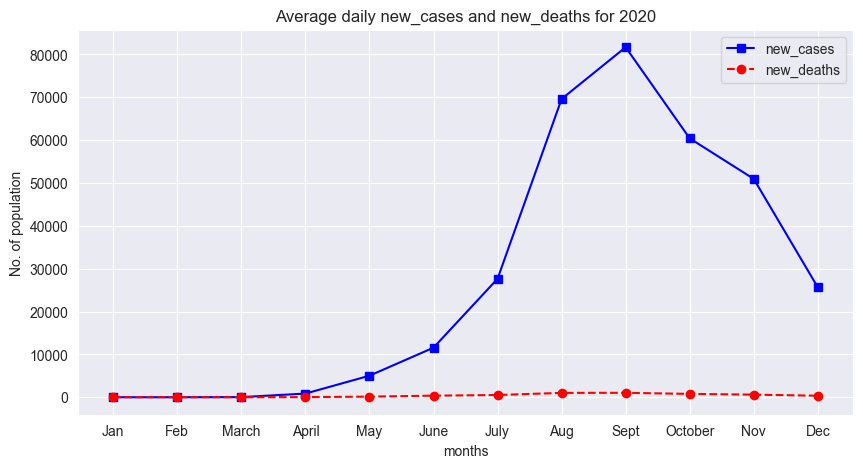

In [94]:
style_graph()

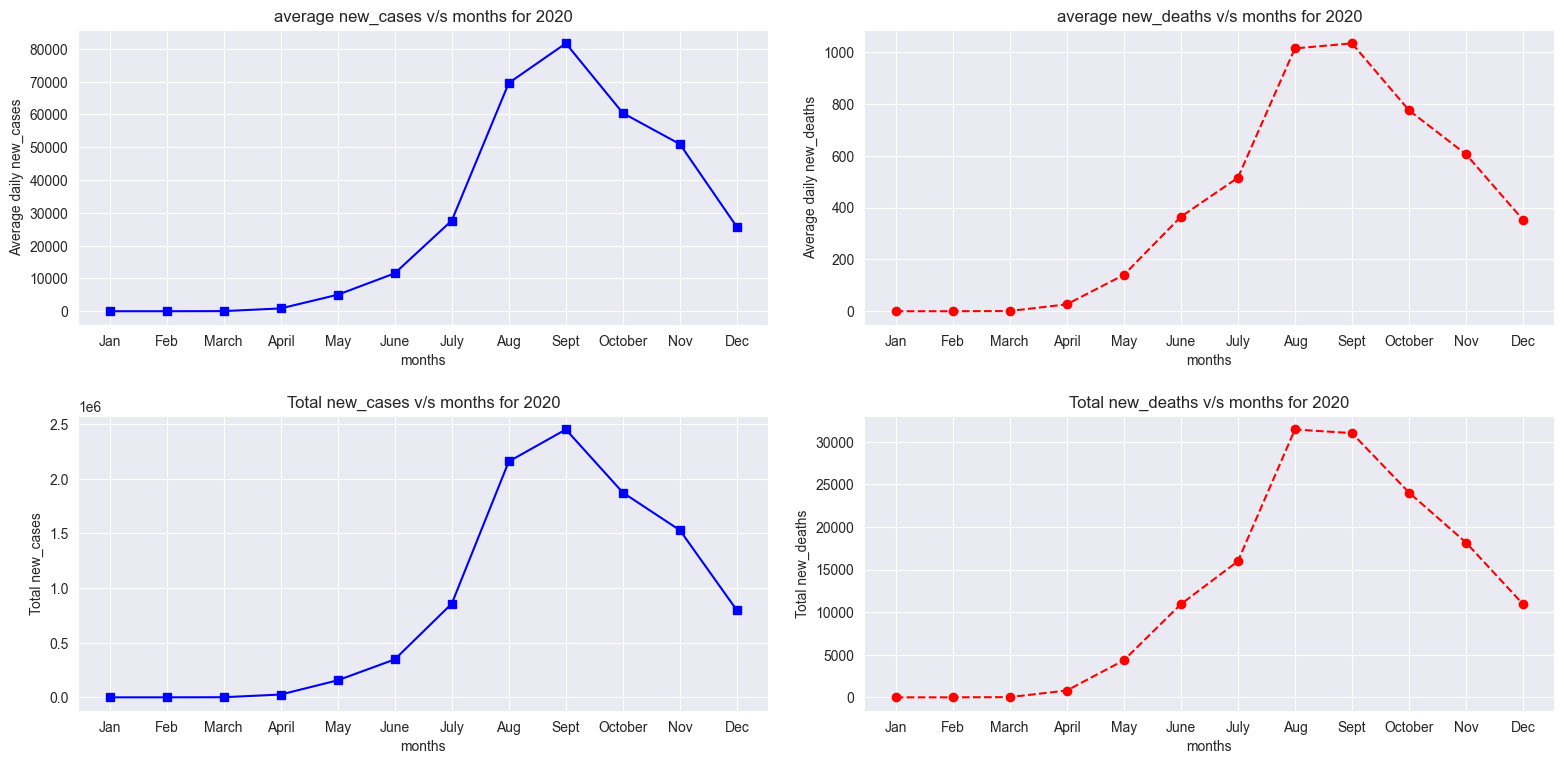

In [103]:
fig,axes = plt.subplots(2,2,figsize=(16,8))
axes[0,0].plot(month_list,monthly_new_cases_2020,'s-b')
axes[0,0].set_xlabel('months')
axes[0,0].set_ylabel('Average daily new_cases')
axes[0,0].set_title('average new_cases v/s months for 2020')

axes[0,1].plot(month_list,monthly_new_deaths_2020,'o--r')
axes[0,1].set_xlabel('months')
axes[0,1].set_ylabel('Average daily new_deaths')
axes[0,1].set_title('average new_deaths v/s months for 2020')

axes[1,0].plot(month_list,monthly_total_new_cases_2020,'s-b')
axes[1,0].set_xlabel('months')
axes[1,0].set_ylabel('Total new_cases')
axes[1,0].set_title('Total new_cases v/s months for 2020')

axes[1,1].plot(month_list,monthly_total_new_deaths_2020,'o--r')
axes[1,1].set_xlabel('months')
axes[1,1].set_ylabel('Total new_deaths')
axes[1,1].set_title('Total new_deaths v/s months for 2020')
plt.tight_layout(pad=2);

### For Year 2021

In [105]:
data_df

,date,new_cases,new_deaths,new_tests,month,weekday,year
173549,2020-01-05,0.0,0.0,NaN,1,6,2020
173550,2020-01-06,0.0,0.0,NaN,1,0,2020
173551,2020-01-07,0.0,0.0,NaN,1,1,2020
173552,2020-01-08,0.0,0.0,NaN,1,2,2020
173553,2020-01-09,0.0,0.0,NaN,1,3,2020
...,...,...,...,...,...,...,...
175226,2024-08-08,NaN,NaN,NaN,8,3,2024
175227,2024-08-09,NaN,NaN,NaN,8,4,2024
175228,2024-08-10,NaN,NaN,NaN,8,5,2024
175229,2024-08-11,NaN,NaN,NaN,8,6,2024


In [114]:
data_2021 = data_df[data_df.year == 2021]
data_df_monthly_2021_mean = data_2021.groupby('month')[['new_cases','new_deaths','new_tests']].mean()
data_df_monthly_2021_sum = data_2021.groupby('month')[['new_cases','new_deaths','new_tests']].sum()
monthly_new_cases_2021 = []
monthly_new_deaths_2021 = []
monthly_total_new_cases_2021 = []
monthly_total_new_deaths_2021 = []
for i in range(1,13,1):
    monthly_new_cases_2021.append(data_df_monthly_2021_mean.at[i,'new_cases'])
    monthly_new_deaths_2021.append(data_df_monthly_2021_mean.at[i,'new_deaths'])
    monthly_total_new_cases_2021.append(data_df_monthly_2021_sum.at[i,'new_cases'])
    monthly_total_new_deaths_2021.append(data_df_monthly_2021_sum.at[i,'new_deaths'])


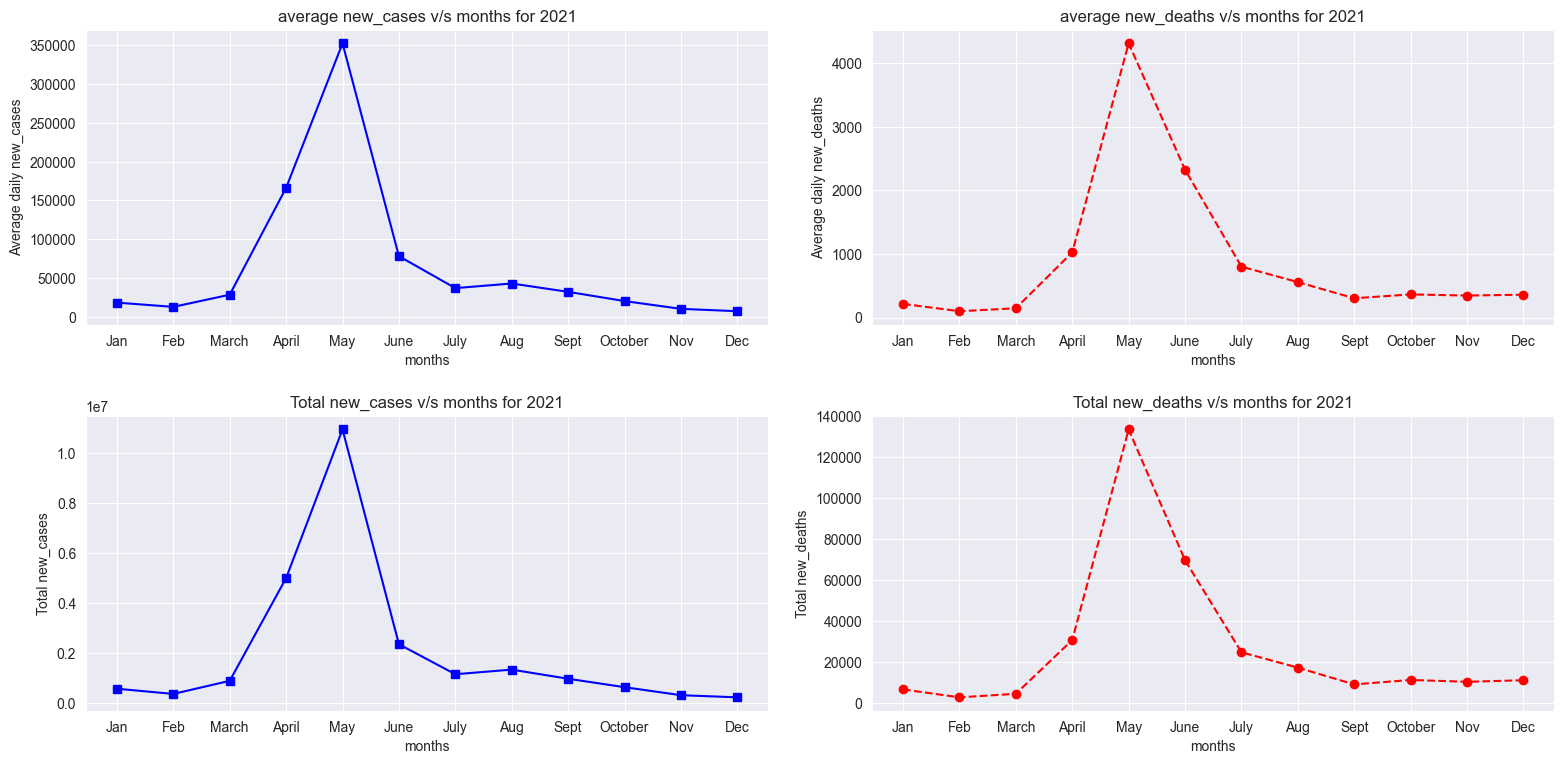

In [115]:
fig,axes = plt.subplots(2,2,figsize=(16,8))
axes[0,0].plot(month_list,monthly_new_cases_2021,'s-b')
axes[0,0].set_xlabel('months')
axes[0,0].set_ylabel('Average daily new_cases')
axes[0,0].set_title('average new_cases v/s months for 2021')

axes[0,1].plot(month_list,monthly_new_deaths_2021,'o--r')
axes[0,1].set_xlabel('months')
axes[0,1].set_ylabel('Average daily new_deaths')
axes[0,1].set_title('average new_deaths v/s months for 2021')

axes[1,0].plot(month_list,monthly_total_new_cases_2021,'s-b')
axes[1,0].set_xlabel('months')
axes[1,0].set_ylabel('Total new_cases')
axes[1,0].set_title('Total new_cases v/s months for 2021')

axes[1,1].plot(month_list,monthly_total_new_deaths_2021,'o--r')
axes[1,1].set_xlabel('months')
axes[1,1].set_ylabel('Total new_deaths')
axes[1,1].set_title('Total new_deaths v/s months for 2021')
plt.tight_layout(pad=2);

### For Year 2022

In [116]:
data_2022 = data_df[data_df.year == 2022]
data_df_monthly_2022_mean = data_2022.groupby('month')[['new_cases','new_deaths','new_tests']].mean()
data_df_monthly_2022_sum = data_2022.groupby('month')[['new_cases','new_deaths','new_tests']].sum()
monthly_new_cases_2022 = []
monthly_new_deaths_2022 = []
monthly_total_new_cases_2022 = []
monthly_total_new_deaths_2022 = []
for i in range(1,13,1):
    monthly_new_cases_2022.append(data_df_monthly_2022_mean.at[i,'new_cases'])
    monthly_new_deaths_2022.append(data_df_monthly_2022_mean.at[i,'new_deaths'])
    monthly_total_new_cases_2022.append(data_df_monthly_2022_sum.at[i,'new_cases'])
    monthly_total_new_deaths_2022.append(data_df_monthly_2022_sum.at[i,'new_deaths'])


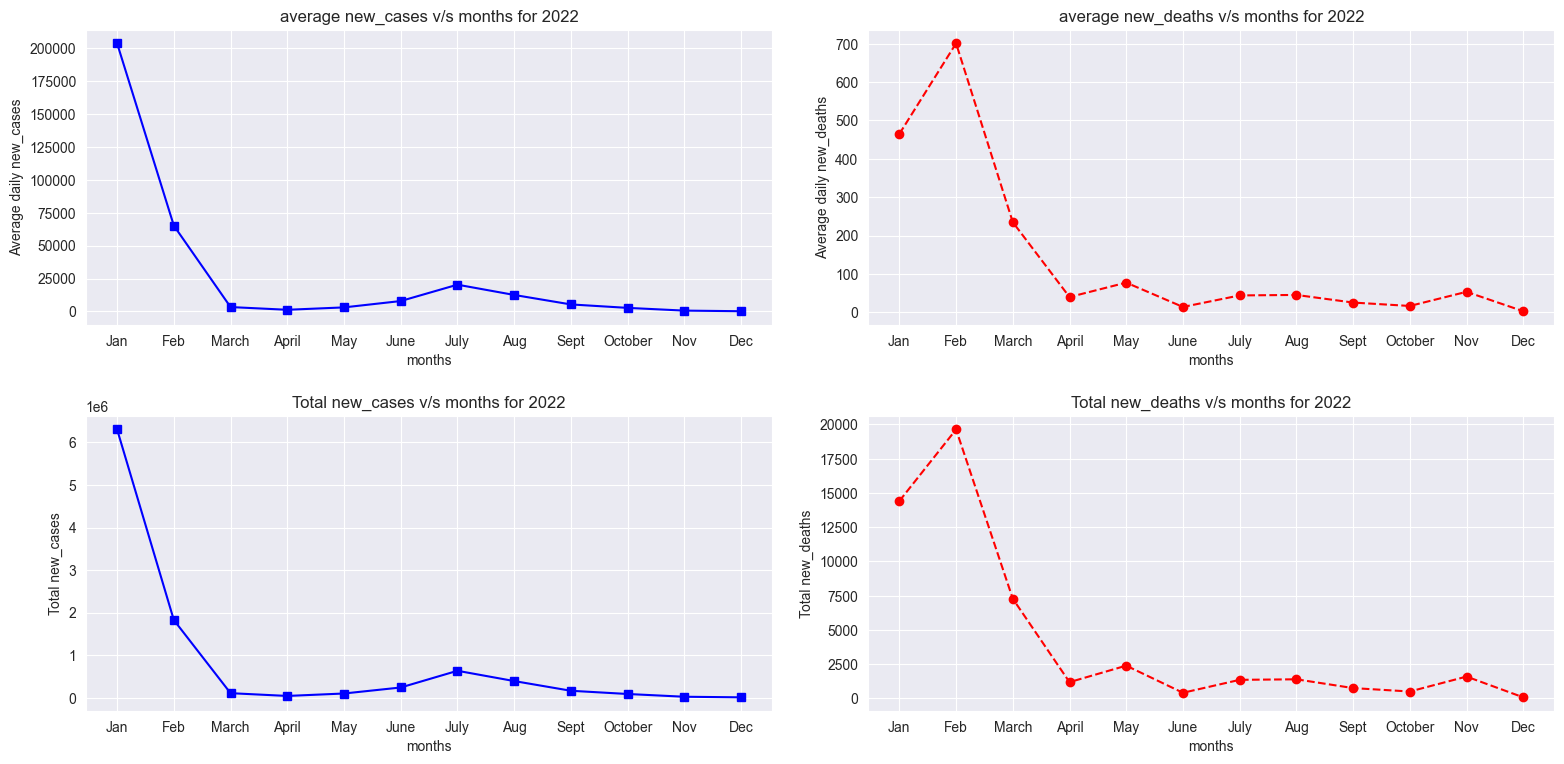

In [117]:
fig,axes = plt.subplots(2,2,figsize=(16,8))
axes[0,0].plot(month_list,monthly_new_cases_2022,'s-b')
axes[0,0].set_xlabel('months')
axes[0,0].set_ylabel('Average daily new_cases')
axes[0,0].set_title('average new_cases v/s months for 2022')

axes[0,1].plot(month_list,monthly_new_deaths_2022,'o--r')
axes[0,1].set_xlabel('months')
axes[0,1].set_ylabel('Average daily new_deaths')
axes[0,1].set_title('average new_deaths v/s months for 2022')

axes[1,0].plot(month_list,monthly_total_new_cases_2022,'s-b')
axes[1,0].set_xlabel('months')
axes[1,0].set_ylabel('Total new_cases')
axes[1,0].set_title('Total new_cases v/s months for 2022')

axes[1,1].plot(month_list,monthly_total_new_deaths_2022,'o--r')
axes[1,1].set_xlabel('months')
axes[1,1].set_ylabel('Total new_deaths')
axes[1,1].set_title('Total new_deaths v/s months for 2022')
plt.tight_layout(pad=2);

### For Year 2023

In [119]:
data_2023 = data_df[data_df.year == 2023]
data_df_monthly_2023_mean = data_2023.groupby('month')[['new_cases','new_deaths','new_tests']].mean()
data_df_monthly_2023_sum = data_2023.groupby('month')[['new_cases','new_deaths','new_tests']].sum()
monthly_new_cases_2023 = []
monthly_new_deaths_2023 = []
monthly_total_new_cases_2023 = []
monthly_total_new_deaths_2023 = []
for i in range(1,13,1):
    monthly_new_cases_2023.append(data_df_monthly_2023_mean.at[i,'new_cases'])
    monthly_new_deaths_2023.append(data_df_monthly_2023_mean.at[i,'new_deaths'])
    monthly_total_new_cases_2023.append(data_df_monthly_2023_sum.at[i,'new_cases'])
    monthly_total_new_deaths_2023.append(data_df_monthly_2023_sum.at[i,'new_deaths'])


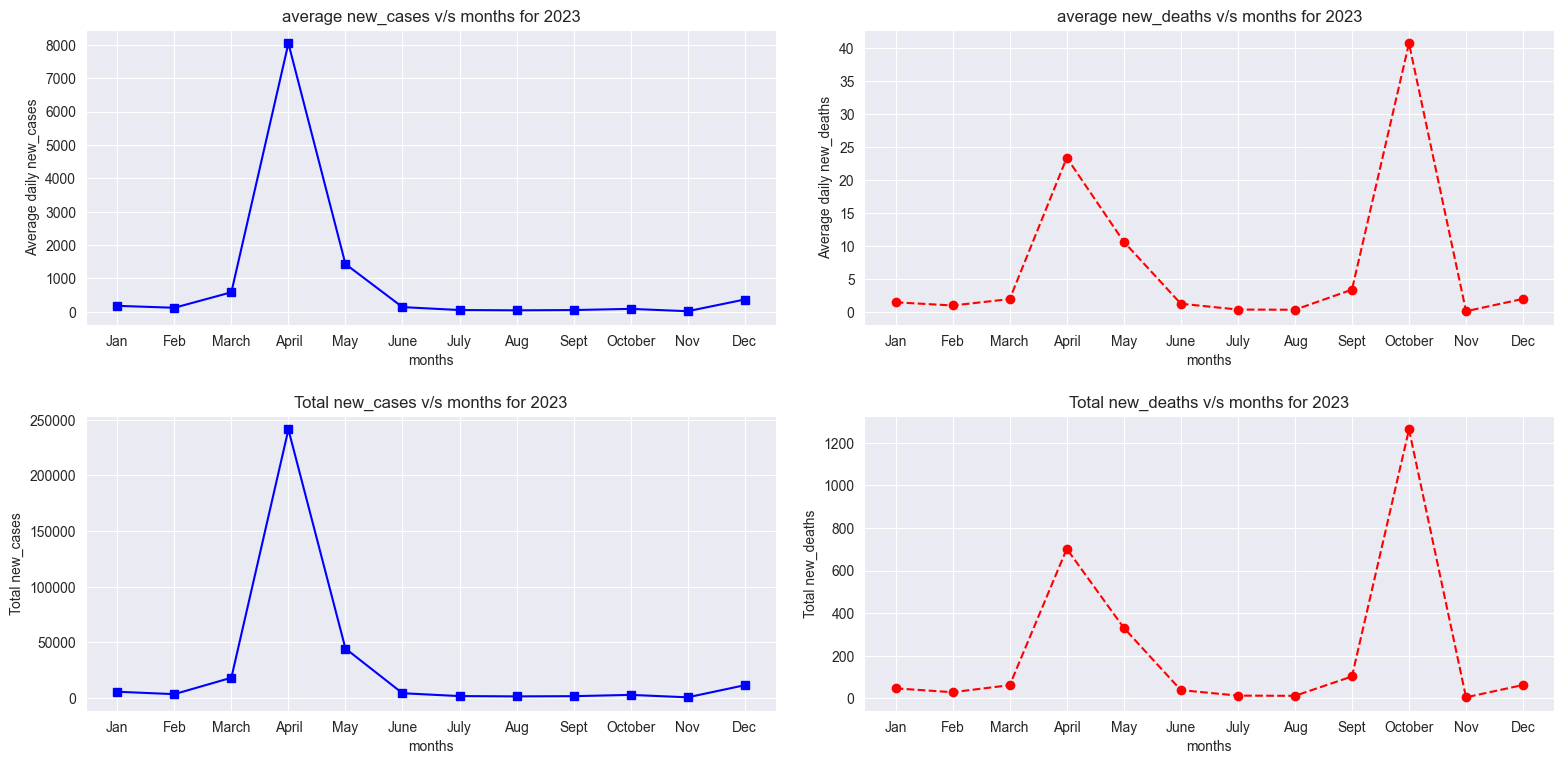

In [120]:
fig,axes = plt.subplots(2,2,figsize=(16,8))
axes[0,0].plot(month_list,monthly_new_cases_2023,'s-b')
axes[0,0].set_xlabel('months')
axes[0,0].set_ylabel('Average daily new_cases')
axes[0,0].set_title('average new_cases v/s months for 2023')

axes[0,1].plot(month_list,monthly_new_deaths_2023,'o--r')
axes[0,1].set_xlabel('months')
axes[0,1].set_ylabel('Average daily new_deaths')
axes[0,1].set_title('average new_deaths v/s months for 2023')

axes[1,0].plot(month_list,monthly_total_new_cases_2023,'s-b')
axes[1,0].set_xlabel('months')
axes[1,0].set_ylabel('Total new_cases')
axes[1,0].set_title('Total new_cases v/s months for 2023')

axes[1,1].plot(month_list,monthly_total_new_deaths_2023,'o--r')
axes[1,1].set_xlabel('months')
axes[1,1].set_ylabel('Total new_deaths')
axes[1,1].set_title('Total new_deaths v/s months for 2023')
plt.tight_layout(pad=2);

### For Year 2024


In [133]:
new_data = data_df[data_df.year == 2024]
total_samples = []
for i in range(1,13,1):
    total_samples.append((new_data.month == i).sum())
print(total_samples)    

[np.int64(31), np.int64(29), np.int64(31), np.int64(30), np.int64(31), np.int64(30), np.int64(31), np.int64(12), np.int64(0), np.int64(0), np.int64(0), np.int64(0)]


In [134]:
data_2024 = data_df[data_df.year == 2024]
data_df_monthly_2024_mean = data_2024.groupby('month')[['new_cases','new_deaths','new_tests']].mean()
data_df_monthly_2024_sum = data_2024.groupby('month')[['new_cases','new_deaths','new_tests']].sum()
print(data_df_monthly_2024_mean)
print(data_df_monthly_2024_sum)

        new_cases  new_deaths  new_tests
month                                   
1      384.000000    2.709677        NaN
2      136.517241    1.137931        NaN
3      171.774194    2.387097        NaN
4       86.433333    1.100000        NaN
5       82.483871    0.870968        NaN
6       36.933333    0.333333        NaN
7       26.354839    0.032258        NaN
8       78.250000    0.000000        NaN
       new_cases  new_deaths  new_tests
month                                  
1        11904.0        84.0        0.0
2         3959.0        33.0        0.0
3         5325.0        74.0        0.0
4         2593.0        33.0        0.0
5         2557.0        27.0        0.0
6         1108.0        10.0        0.0
7          817.0         1.0        0.0
8          313.0         0.0        0.0


In [137]:
arr = np.arange(1,9,1)
dict = {
    1: 'Jan',
    2: 'Feb',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'Aug',
    9: 'Sept',
    10: 'October',
    11: 'Nov',
    12: 'Dec'
}
month_list = []
for i in arr:
    month_list.append(dict[i])
print(month_list)

['Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'Aug']


In [138]:
data_2024 = data_df[data_df.year == 2024]
data_df_monthly_2024_mean = data_2024.groupby('month')[['new_cases','new_deaths','new_tests']].mean()
data_df_monthly_2024_sum = data_2024.groupby('month')[['new_cases','new_deaths','new_tests']].sum()
monthly_new_cases_2024 = []
monthly_new_deaths_2024 = []
monthly_total_new_cases_2024 = []
monthly_total_new_deaths_2024 = []
for i in range(1,9,1):
    monthly_new_cases_2024.append(data_df_monthly_2024_mean.at[i,'new_cases'])
    monthly_new_deaths_2024.append(data_df_monthly_2024_mean.at[i,'new_deaths'])
    monthly_total_new_cases_2024.append(data_df_monthly_2024_sum.at[i,'new_cases'])
    monthly_total_new_deaths_2024.append(data_df_monthly_2024_sum.at[i,'new_deaths'])


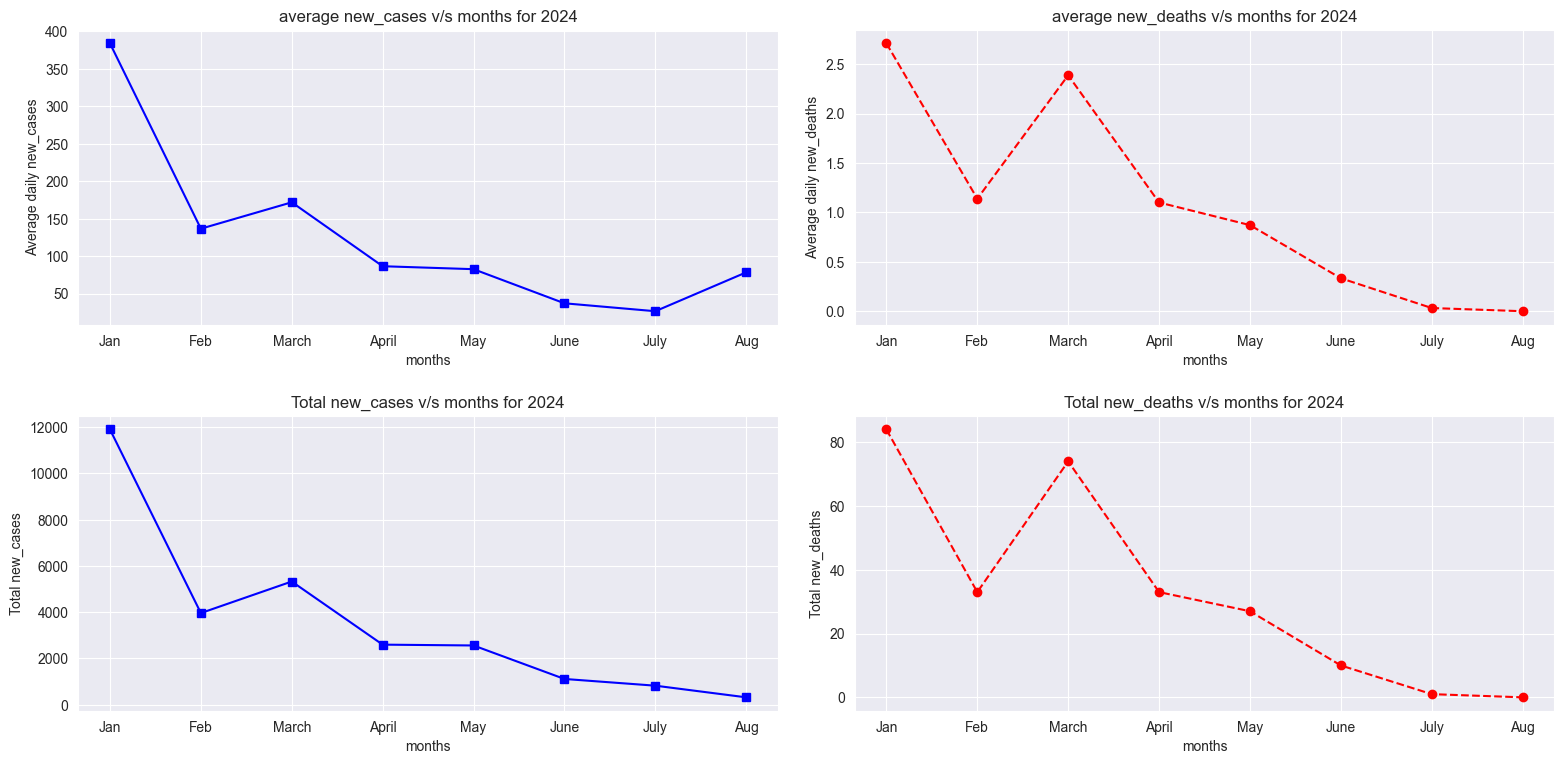

In [139]:
fig,axes = plt.subplots(2,2,figsize=(16,8))
axes[0,0].plot(month_list,monthly_new_cases_2024,'s-b')
axes[0,0].set_xlabel('months')
axes[0,0].set_ylabel('Average daily new_cases')
axes[0,0].set_title('average new_cases v/s months for 2024')

axes[0,1].plot(month_list,monthly_new_deaths_2024,'o--r')
axes[0,1].set_xlabel('months')
axes[0,1].set_ylabel('Average daily new_deaths')
axes[0,1].set_title('average new_deaths v/s months for 2024')

axes[1,0].plot(month_list,monthly_total_new_cases_2024,'s-b')
axes[1,0].set_xlabel('months')
axes[1,0].set_ylabel('Total new_cases')
axes[1,0].set_title('Total new_cases v/s months for 2024')

axes[1,1].plot(month_list,monthly_total_new_deaths_2024,'o--r')
axes[1,1].set_xlabel('months')
axes[1,1].set_ylabel('Total new_deaths')
axes[1,1].set_title('Total new_deaths v/s months for 2024')
plt.tight_layout(pad=2);

### Yearly data 


In [145]:
data_df[data_df.year == 2020].new_cases.sum()

np.float64(10187850.0)

In [162]:
yearly_total_new_cases = []
yearly_total_new_deaths = []
for i in range(2020,2025,1):
    yearly_total_new_cases.append(data_df[data_df.year == i].new_cases.sum())
    yearly_total_new_deaths.append(data_df[data_df.year == i].new_deaths.sum())
print(yearly_total_new_cases)
print(yearly_total_new_deaths)

[np.float64(10187850.0), np.float64(24598952.0), np.float64(9890304.0), np.float64(336066.0), np.float64(28576.0)]
[np.float64(147622.0), np.float64(332060.0), np.float64(51011.0), np.float64(2668.0), np.float64(262.0)]


In [163]:
years = np.arange(2020,2025)

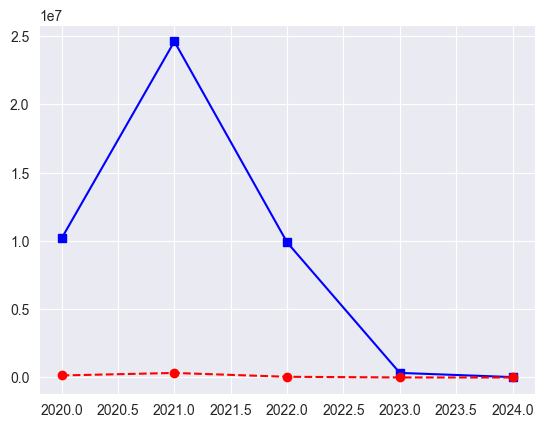

In [164]:
plt.plot(years,yearly_total_new_cases,'s-b')
plt.plot(years,yearly_total_new_deaths,'o--r')